# 라이브러리 및 데이터 불러오기

In [ ]:
!conda install -c conda-forge contextily
!conda install -c conda-forge geoplot
!conda install -c conda-forge eli5
!conda install -c conda-forge pdpbox
!conda install -c conda-forge shap

In [4]:
import urllib.request
import shutil
import zipfile
import re
import contextily as ctx
import geoplot as gplt

In [7]:
from shapely.geometry import  Point
import geopandas as gpd
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
# import shap

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import os as os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.impute import SimpleImputer
plt.style.use('seaborn')

In [11]:
train=pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/Crime/train.csv",parse_dates=['Dates'])
test=pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/Crime/test.csv",parse_dates=['Dates'],index_col='Id')
sample_submission=pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/Crime/sampleSubmission.csv")

# 데이터 살펴보기

In [12]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [20]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


Dates - 범죄가 일어난 일시

Category - 범죄 유형 (이 값이 Target variable임)

Descript - 범죄에 대한 자세한 설명

DayOfWeek - 요일

PdDistrict - 경찰 관할 지역 명칭

Resolution - 범죄 해결 여부

Address - 범죄 발생 주소

X - 경도(Longitude)

Y - 위도(Latitude)

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884258,884258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884259,884259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884260,884260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# 데이터 전처리 및 시각화

In [13]:
train.duplicated().sum()

2323

In [14]:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates',
                          crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(train)

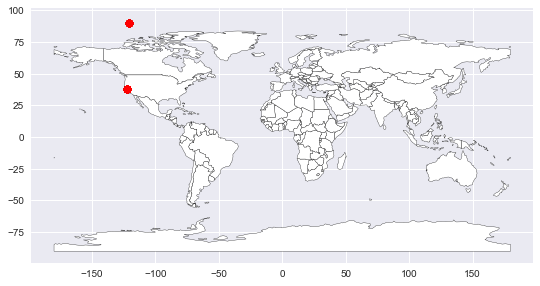

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

f, ax = plt.subplots(1, figsize=(9,9))
ax = world.plot(color='white', edgecolor='black', axes=ax)
train_gdf.plot(ax=ax, color='red');

In [16]:
print(train_gdf.loc[train_gdf.Y > 50].count()[0])
train_gdf.loc[train_gdf.Y > 50].sample(5)

67


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
839585,2003-07-08 19:22:00,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Tuesday,SOUTHERN,"ARREST, BOOKED",1ST ST / BRANNAN ST,-120.5,90.0,POINT (-120.50000 90.00000)
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.50000 90.00000)
842259,2003-06-25 07:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,RICHMOND,NONE,JOHN F KENNEDY DR / MARTIN LUTHER KING JR DR,-120.5,90.0,POINT (-120.50000 90.00000)
773159,2004-05-27 00:45:00,WARRANTS,WARRANT ARREST,Thursday,NORTHERN,"ARREST, BOOKED",LARKIN ST / AUSTIN ST,-120.5,90.0,POINT (-120.50000 90.00000)
833921,2003-08-06 12:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90.0,POINT (-120.50000 90.00000)


중복된 값 제거

In [17]:
train.duplicated().sum()

2323

In [18]:
train.drop_duplicates(inplace=True)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


이상치를 제거하는 경우

In [19]:
outlier=train_gdf.index[train_gdf.Y > 50]
outlier

Int64Index([660485, 660711, 660712, 661106, 666430, 667042, 669946, 671709,
            673078, 673114, 673115, 673510, 674043, 675070, 675073, 675288,
            675540, 677036, 677260, 677268, 677828, 678326, 678539, 678540,
            679643, 682780, 683862, 684406, 685719, 685720, 686997, 687519,
            687527, 688950, 692258, 712309, 719993, 727080, 754828, 756059,
            759292, 759397, 767318, 767501, 767502, 772415, 772431, 773159,
            783919, 788574, 788575, 789255, 798834, 823378, 833362, 833921,
            839585, 842259, 842261, 842434, 842435, 842828, 844995, 845842,
            852880, 857248, 871198],
           dtype='int64')

In [20]:
len(outlier)

67

In [37]:
train=train.drop(index=outlier)
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


이상치를 Imputation 하는 경우

In [22]:
train_gdf[train_gdf.Y > 50]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,POINT (-120.50000 90.00000)
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,POINT (-120.50000 90.00000)
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,POINT (-120.50000 90.00000)
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,POINT (-120.50000 90.00000)
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,POINT (-120.50000 90.00000)
...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.50000 90.00000)
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.50000 90.00000)
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,POINT (-120.50000 90.00000)
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,POINT (-120.50000 90.00000)


In [21]:
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

In [42]:
imputer = SimpleImputer(strategy='mean')

In [43]:
for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict']==district, ['X', 'Y']] = imputer.fit_transform(
        train.loc[train['PdDistrict']==district, ['X', 'Y']])
    # fit은 train 데이터로 해주었기때문에 transform만 적용
    test.loc[test['PdDistrict']==district, ['X', 'Y']] = imputer.transform(
        test.loc[test['PdDistrict']==district, ['X', 'Y']])    
    
train_gdf = create_gdf(train)

Distribution of number of incidents per day

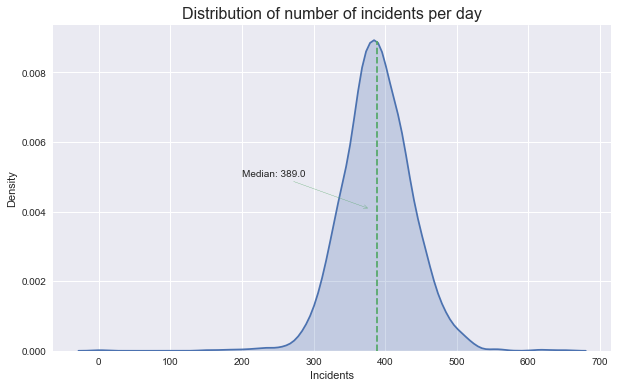

In [44]:
col = sns.color_palette()

train['Date'] = train.Dates.dt.date
train['Hour'] = train.Dates.dt.hour

plt.figure(figsize=(10, 6))
data = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribution of number of incidents per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()

요일 별 사건

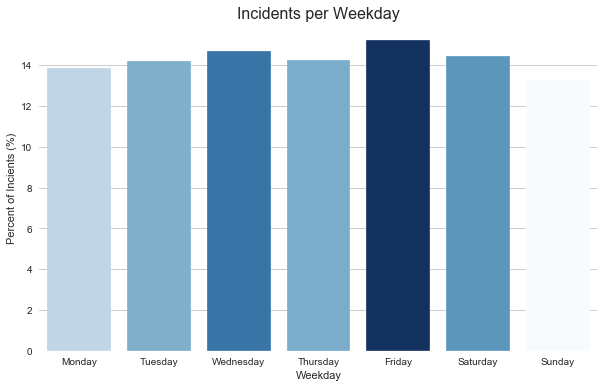

In [48]:
weekday_series = train.groupby('DayOfWeek').count().iloc[:,0]
weekday_series = weekday_series.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'])

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(1, figsize=(10, 6))
    sns.barplot(
        weekday_series.index, (weekday_series.values / weekday_series.values.sum()) * 100,
        palette=cm.ScalarMappable(cmap='Blues').to_rgba(weekday_series.values))

plt.title('Incidents per Weekday', fontdict={'fontsize':16})
plt.xlabel('Weekday')
plt.ylabel('Percent of Incients (%)');

In [40]:
category_counts = train.groupby('Category').count().iloc[:, 0].sort_values(ascending=False)
category_counts

Category
LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUN

In [25]:
# OTHER OFFENSES를 제일 아래 두기 위해
category_counts = category_counts.reindex(
    np.append(np.delete(category_counts.index, 1), 'OTHER OFFENSES'))

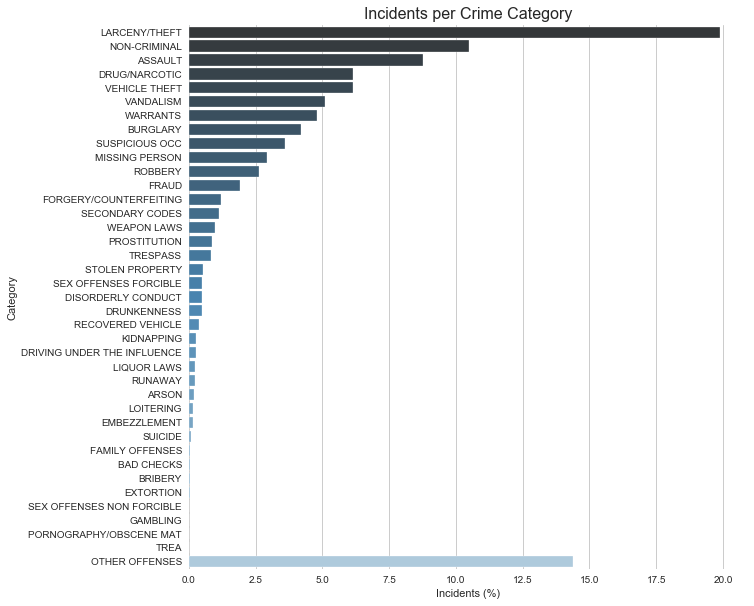

In [52]:
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(1, figsize=(10, 10))
    sns.barplot(
        category_counts.values / category_counts.values.sum() * 100,
        category_counts.index,
        orient='h',
        palette='Blues_d')
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)');

In [26]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (
        data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False)
    
    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

In [27]:
train = feature_engineering(train)
train.drop(columns=['Descript','Resolution'], inplace=True)
test = feature_engineering(test)
train

,Category,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,4510,13,5,2015,23,30,True
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,TARAVAL,-122.459033,37.714056,0,6,1,2003,0,15,False
878045,LARCENY/THEFT,0,INGLESIDE,-122.447364,37.731948,0,6,1,2003,0,1,True
878046,LARCENY/THEFT,0,SOUTHERN,-122.403390,37.780266,0,6,1,2003,0,1,False
878047,VANDALISM,0,SOUTHERN,-122.390531,37.780607,0,6,1,2003,0,1,False


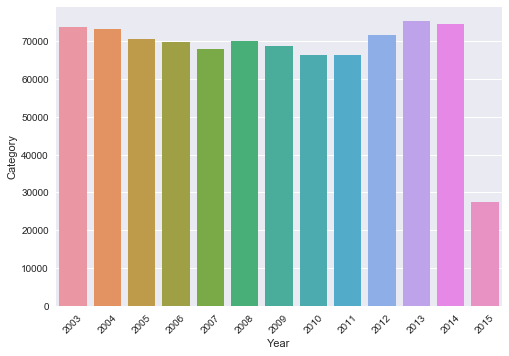

In [28]:
year_series = train.groupby('Year').count().iloc[:, 0]
g = sns.barplot(x=year_series.index, y=year_series)
g.set_xticklabels(g.get_xticklabels(), rotation=45);

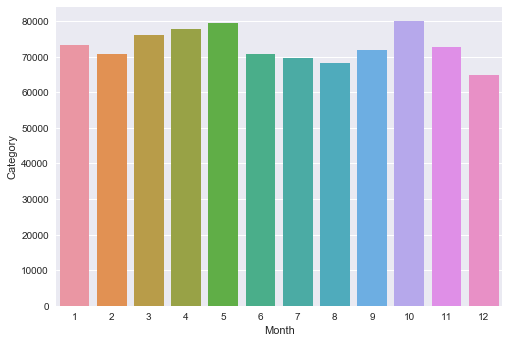

In [29]:
month_series = train.groupby('Month').count().iloc[:, 0]
sns.barplot(x=month_series.index, y=month_series);

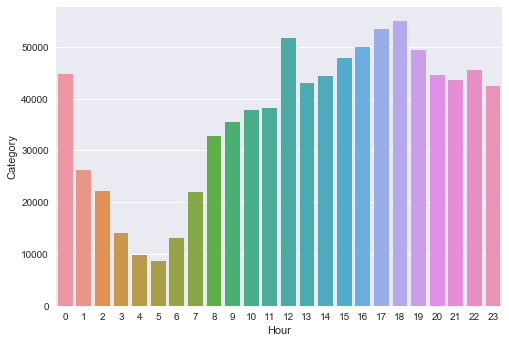

In [30]:
hour_series = train.groupby('Hour').count().iloc[:, 0]
sns.barplot(x=hour_series.index, y=hour_series);

In [ ]:
# PdDistrict 변수를 OnehotEncording

#le1 = LabelEncoder()
# train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
# test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
X = train.drop(columns=['Category'])
y= le2.fit_transform(train['Category'])

In [ ]:
X

In [ ]:
df_y=pd.DataFrame(y)
df_y.apply(pd.value_counts)

In [ ]:
train_data = lgb.Dataset(X, label=y, categorical_feature=['PdDistrict', ])
params = {'boosting':'gbdt',
          'objective':'multiclass',
          'num_class':39,
          'max_delta_step':0.9,
          'min_data_in_leaf': 21,
          'learning_rate': 0.4,
          'max_bin': 465,
          'num_leaves': 41,
          'verbose' : 1}

bst = lgb.train(params, train_data, 120)
predictions = bst.predict(test)

submission = pd.DataFrame(predictions, columns=le2.inverse_transform(np.linspace(0, 38, 39, dtype='int16')), index=test.index)
submission.to_csv('LGBM_final.csv', index_label='Id')